In [1]:
import acquire
import prepare
import explore
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas import DataFrame
from acquire import acquire_telco_data
from prepare import train_validate_test_split
from prepare import prep_telco_data

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Acquire

In [2]:
df = acquire_telco_data

In [3]:
df = acquire_telco_data(df)


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [7]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [8]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

# Prepare

In [9]:
df = prep_telco_data(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   customer_id                             7043 non-null   object
 1   senior_citizen                          7043 non-null   int64 
 2   tenure                                  7043 non-null   int64 
 3   internet_service_Fiber optic            7043 non-null   uint8 
 4   internet_service_No                     7043 non-null   uint8 
 5   gender_Male                             7043 non-null   uint8 
 6   payment_method_Credit card (automatic)  7043 non-null   uint8 
 7   payment_method_Electronic check         7043 non-null   uint8 
 8   payment_method_Mailed check             7043 non-null   uint8 
 9   contract_One year                       7043 non-null   uint8 
 10  contract_Two year                       7043 non-null   uint8 
 11  part

In [11]:
df.head()

,customer_id,senior_citizen,tenure,internet_service_Fiber optic,internet_service_No,gender_Male,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,contract_One year,...,device_protection_No internet service,device_protection_Yes,Churn_Yes,tech_support_No internet service,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_Yes
0,7590-VHVEG,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5575-GNVDE,0,34,0,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,45,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


# Explore

In [12]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'Churn_Yes',
                                                  seed=1349)

In [13]:
train.head()

,customer_id,senior_citizen,tenure,internet_service_Fiber optic,internet_service_No,gender_Male,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,contract_One year,...,device_protection_No internet service,device_protection_Yes,Churn_Yes,tech_support_No internet service,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_Yes
6808,1116-DXXDF,0,39,1,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
421,5605-IYGFG,0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,1066-JKSGK,0,1,0,1,1,0,0,1,0,...,1,0,1,1,0,1,0,1,0,0
3153,9099-FTUHS,0,23,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4409,5227-JSCFE,1,71,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [14]:
X_train = train.drop(columns=['Churn_Yes'])
y_train = train.Churn_Yes

X_validate = validate.drop(columns=['Churn_Yes'])
y_validate = validate.Churn_Yes

X_test = test.drop(columns=['Churn_Yes'])
y_test = test.Churn_Yes

In [15]:
df.Churn_Yes.value_counts() # (We will use 'No')

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [16]:
baseline_accuracy = (train.Churn_Yes== 0).mean()
round(baseline_accuracy, 3)

0.735

# Value Count

In [17]:
cat_vars = ['Churn_Yes','senior_citizen','partner_Yes','dependents_Yes','phone_service_Yes',
            'multiple_lines_Yes','online_security_Yes',
            'streaming_tv_Yes','streaming_movies_Yes',
            'paperless_billing_Yes','online_backup_Yes','device_protection_Yes',
            'tech_support_Yes','internet_service_Fiber optic',
            'internet_service_No','gender_Male','payment_method_Credit card (automatic)',
            'payment_method_Electronic check','payment_method_Mailed check','contract_One year',
            'contract_Two year']

quant_vars = ['monthly_charges','total_charges','tenure']

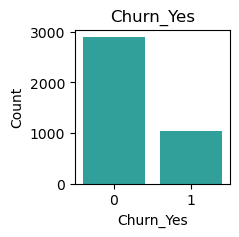

   Churn_Yes  Count  Percent
0          0   2897    73.47
1          1   1046    26.53
_________________________________________________________________


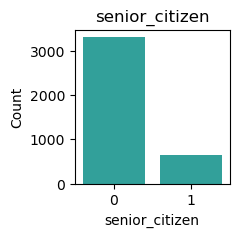

   senior_citizen  Count  Percent
0               0   3307    83.87
1               1    636    16.13
_________________________________________________________________


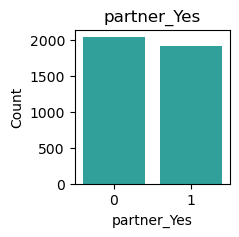

   partner_Yes  Count  Percent
0            0   2035    51.61
1            1   1908    48.39
_________________________________________________________________


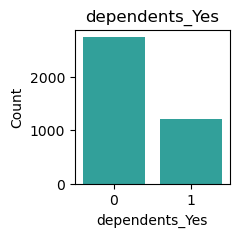

   dependents_Yes  Count  Percent
0               0   2742    69.54
1               1   1201    30.46
_________________________________________________________________


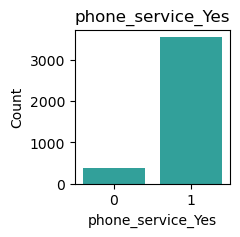

   phone_service_Yes  Count  Percent
1                  1   3561    90.31
0                  0    382     9.69
_________________________________________________________________


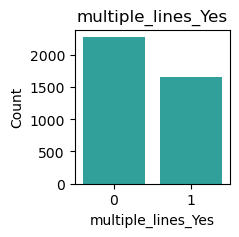

   multiple_lines_Yes  Count  Percent
0                   0   2283     57.9
1                   1   1660     42.1
_________________________________________________________________


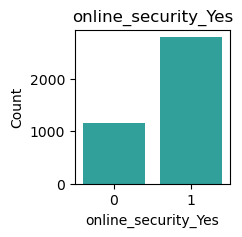

   online_security_Yes  Count  Percent
0                    1   2795    70.89
1                    0   1148    29.11
_________________________________________________________________


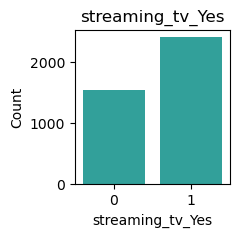

   streaming_tv_Yes  Count  Percent
0                 1   2403    60.94
1                 0   1540    39.06
_________________________________________________________________


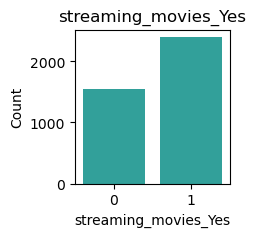

   streaming_movies_Yes  Count  Percent
0                     1   2401    60.89
1                     0   1542    39.11
_________________________________________________________________


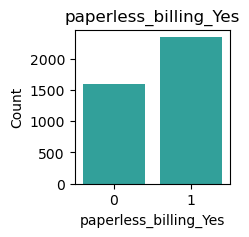

   paperless_billing_Yes  Count  Percent
1                      1   2349    59.57
0                      0   1594    40.43
_________________________________________________________________


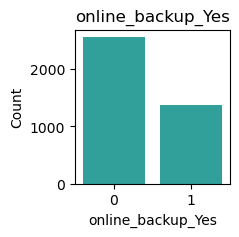

   online_backup_Yes  Count  Percent
0                  0   2563     65.0
1                  1   1380     35.0
_________________________________________________________________


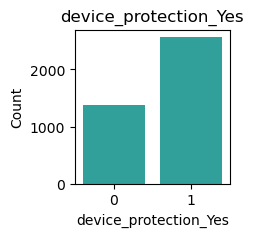

   device_protection_Yes  Count  Percent
0                      1   2570    65.18
1                      0   1373    34.82
_________________________________________________________________


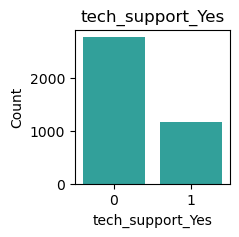

   tech_support_Yes  Count  Percent
0                 0   2772     70.3
1                 1   1171     29.7
_________________________________________________________________


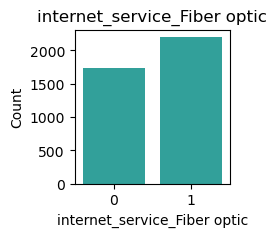

   internet_service_Fiber optic  Count  Percent
0                             1   2201    55.82
1                             0   1742    44.18
_________________________________________________________________


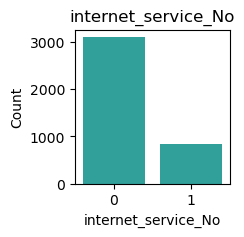

   internet_service_No  Count  Percent
0                    0   3100    78.62
1                    1    843    21.38
_________________________________________________________________


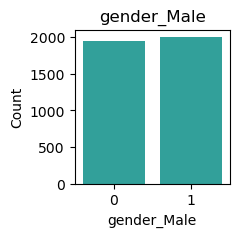

   gender_Male  Count  Percent
1            1   2001    50.75
0            0   1942    49.25
_________________________________________________________________


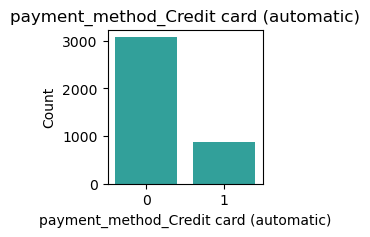

   payment_method_Credit card (automatic)  Count  Percent
0                                       0   3077    78.04
1                                       1    866    21.96
_________________________________________________________________


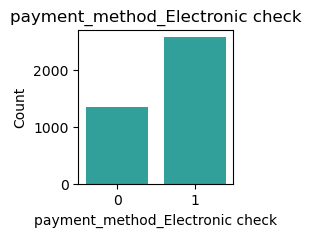

   payment_method_Electronic check  Count  Percent
0                                1   2585    65.56
1                                0   1358    34.44
_________________________________________________________________


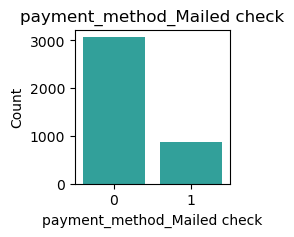

   payment_method_Mailed check  Count  Percent
0                            0   3070    77.86
1                            1    873    22.14
_________________________________________________________________


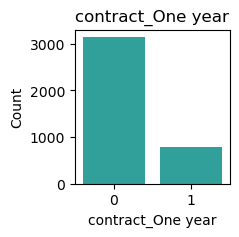

   contract_One year  Count  Percent
0                  0   3146    79.79
1                  1    797    20.21
_________________________________________________________________


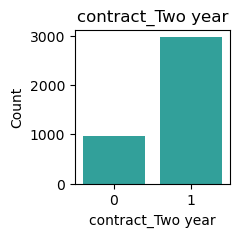

   contract_Two year  Count  Percent
0                  1   2971    75.35
1                  0    972    24.65
_________________________________________________________________


KeyError: 'monthly_charges'

In [18]:
explore.explore_univariate(train, cat_vars, quant_vars)
